# `DSML_WS_09` - Group Project Q&A

Please work on the following task **before** the ninth workshop session.

*Note*: Because there is no new Python content during this week, there is only one task to prepare for this workshop.

## 1. Predicting electricity demand - continued

In the preparation task for workshop 8, you predicted **average electrical load** from **average temperature** using polynomial features with `scikit learn`. Let us continue from there by doing the following: 

- Load data and filter dataframe to exclude any observations with `Avg_temp` outside the range of -20 to +30 degrees.
- Define X and y vectors, and perform train/test split.
- Create polynomial features up to degree 50 and scale using `StandardScaler`.
- Initialize and fit model using `LinearRegression`.
- Initialize and fit second model with appropriate alpha using `Ridge`.
- Initialize and fit third model with appropriate alpha using `Lasso`.
- Initialize and fit fourth model with appropriate value for n_neighbors using `KNeighborsRegressor`.
- Compare model performances using `mean_absolute_error` and `r2_score`.
- **Extra task**: for each of the four models, create a scatter plot of the test data and plot the regression line on top of it.

            Date       AVG       MAX       MIN      Total  High_temp  Avg_temp
0     01.01.2013  1.598524  1.859947  0.001599  38.368031        0.0     -1.68
1     02.01.2013  1.809347  2.054215  0.001809  43.428194       -3.9     -6.58
2     03.01.2013  1.832822  2.049550  0.001833  43.991607        0.6     -6.12
3     04.01.2013  1.812699  2.008168  0.001813  43.508609        0.0     -1.95
4     05.01.2013  1.662036  1.838251  0.001662  39.892360        1.7     -1.47
...          ...       ...       ...       ...        ...        ...       ...
1820  27.12.2017  1.765841  1.983683  0.001766  42.383931       -9.4    -11.78
1821  28.12.2017  1.830477  2.001531  0.001830  43.935292      -10.0    -13.46
1822  29.12.2017  1.783624  1.940514  0.001784  42.810692       -7.8     -9.49
1823  30.12.2017  1.706644  1.909027  0.001707  40.963066       -7.8     -9.25
1824  31.12.2017  1.749602  1.937984  0.001750  41.994143      -10.6    -14.10

[1825 rows x 7 columns]
Linear Regression - MSE: 0.

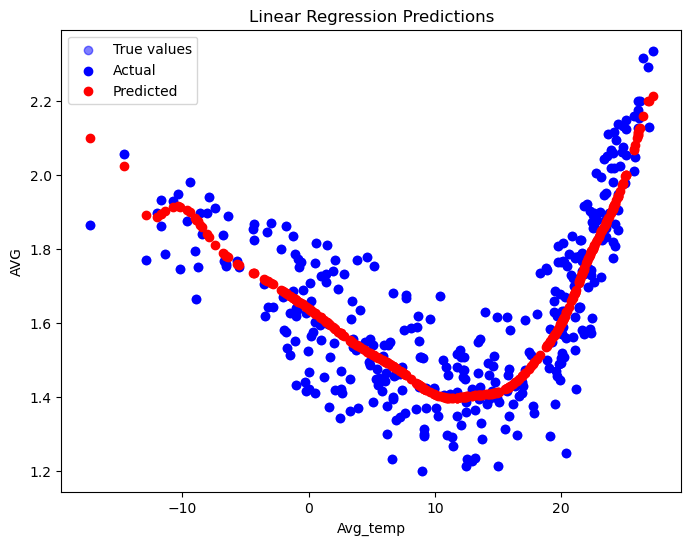

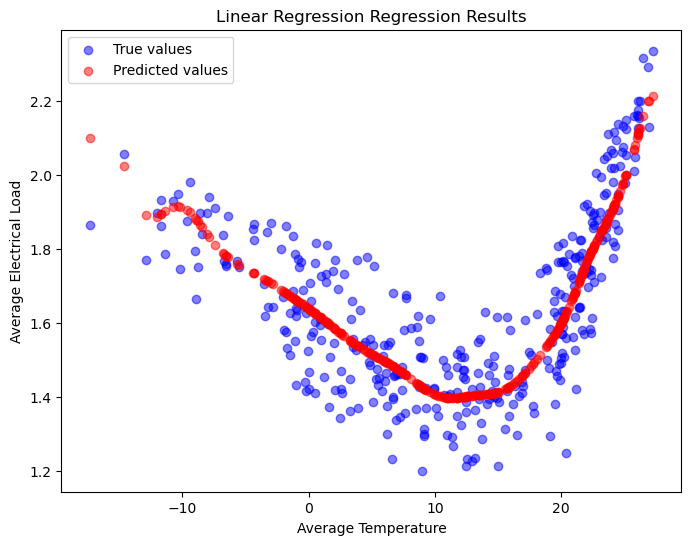

Ridge Regression - MSE: 0.01,  R^2: 0.76


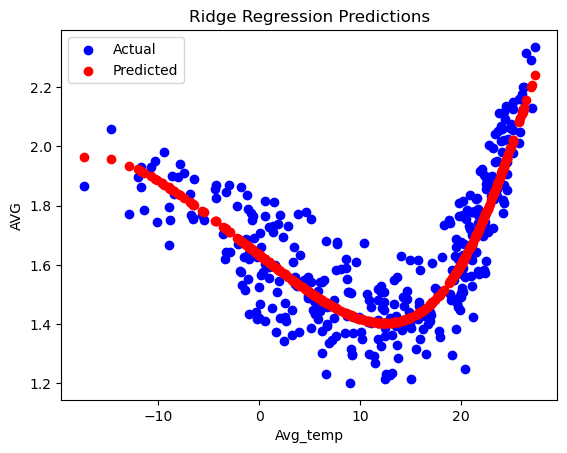

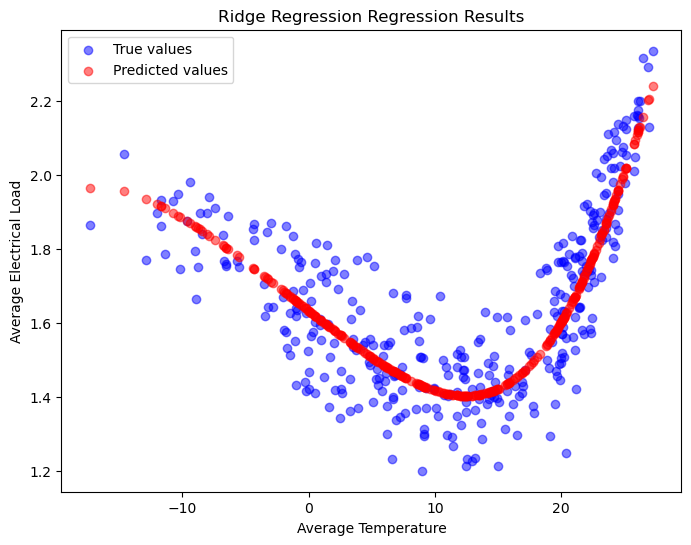

Lasso Regression - MSE: 0.05,  R^2: 0.07


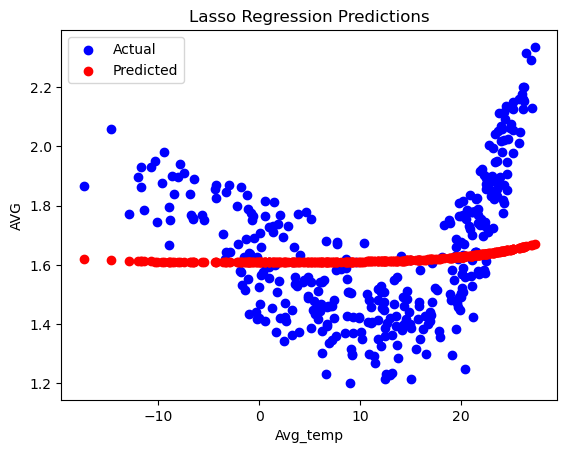

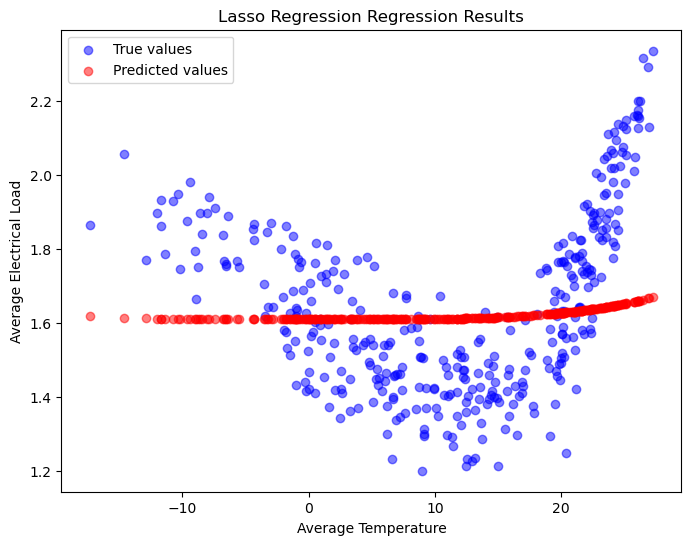

K-Nearest Neighbors - MSE: 0.02,  R^2: 0.71


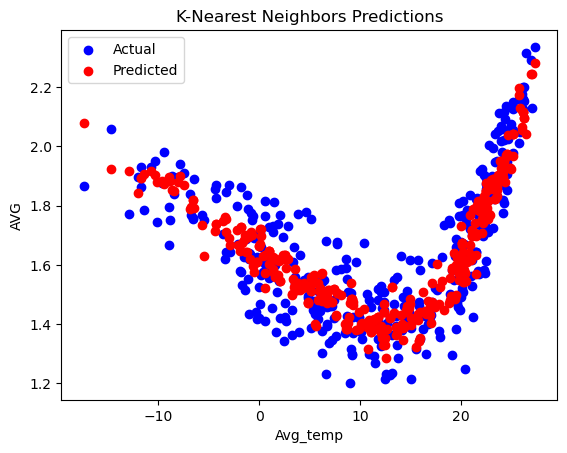

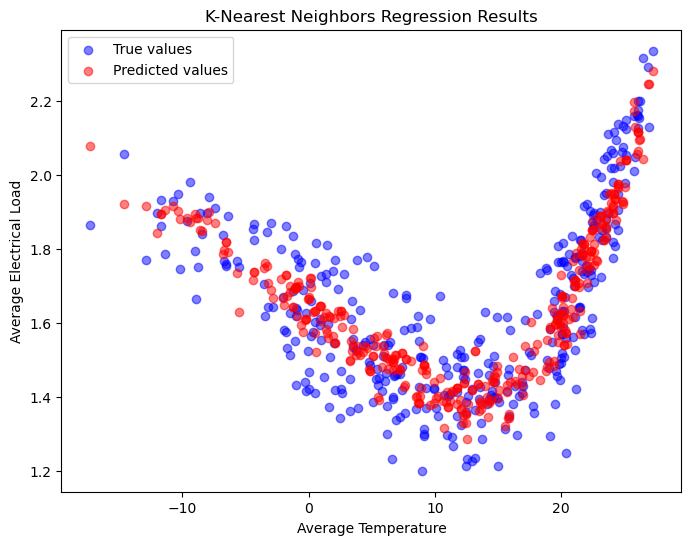

c:\Users\kilia\anaconda3\envs\DSML_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


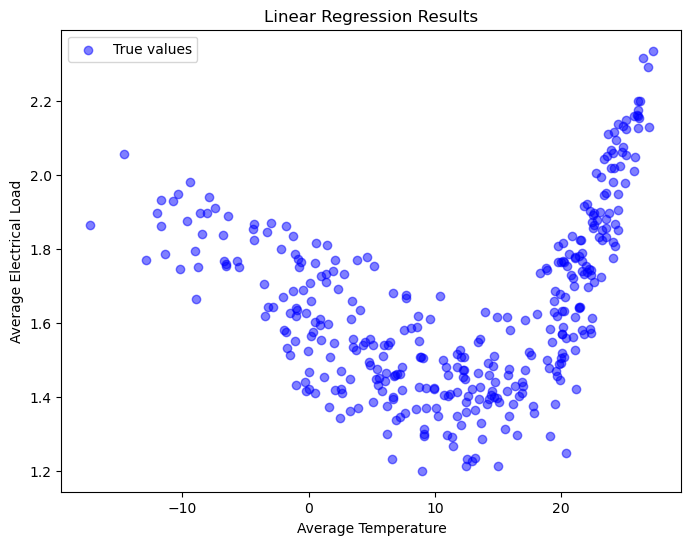

In [ ]:
# your code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

data = pd.read_csv('Pittsburgh_load_data.csv')
data_filtered = data[(data['Avg_temp'] >= -20) & data['Avg_temp'] <= 30]
print(data_filtered)

#X and Y Vectory
X = data_filtered[['Avg_temp']]
Y = data_filtered['AVG']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=50)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)

}

for name, model in models.items():
    model.fit(X_train_scaled, Y_train)
    Y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    
    print(f"{name} - MSE: {mse:.2f},  R^2: {r2:.2f}")
    
    plt.scatter(X_test, Y_test, color='blue', label='Actual')
    plt.scatter(X_test, Y_pred, color='red', label='Predicted')
    plt.title(f"{name} Predictions")
    plt.xlabel('Avg_temp')
    plt.ylabel('AVG')
    plt.legend()
    plt.show()

    #Extra
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, Y_test, color="blue", alpha=0.5, label="True values")
    plt.scatter(X_test, Y_pred, color="red", alpha=0.5, label="Predicted values")
    plt.title(f"{name} Regression Results")
    plt.xlabel("Average Temperature")
    plt.ylabel("Average Electrical Load")
    plt.legend()
    plt.show()